In [1]:
import pandas as pd
import numpy as np
import math
import statistics as stats
from sklearn import linear_model
lm = linear_model.LinearRegression()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#1 Problem (case study)
# This mailing was sent to a total of 3.5 million “Healthcare for All” donors who were on the database as of June 1997. 
# Everyone included in this mailing had made at least one prior donation.
# The mailing included a gift (or “premium”) of personalized name & address labels plus an 
# assortment of 10 note cards and envelopes. 
# All of the donors who received this mailing were acquired by “Healthcare for All” through similar premium-oriented 
# appeals such as this.
# One group that is of particular interest to the organization is “Lapsed” donors. 
# These are individuals who made their last donation 13 to 24 months ago. 
# They represent an important group to the organization, since the longer someone goes without donating, 
# the less likely they will be to give again. 
# Therefore, the recapture of these former donors is a critical aspect of their fund raising efforts.
# However, it was found that there is often an inverse correlation between likelihood to respond and the dollar amount 
# of the gift, so a straight response model (a classification or discrimination task) will most likely net only 
# very low dollar donors. 
# High dollar donors will fall into the lower deciles, which would most likely be suppressed from future mailings. 
# The lost revenue of these suppressed donors would then offset any gains due to the increased response rate of 
# the low dollar donors.

# Therefore, the GOAL is to improve the cost-effectiveness of future direct marketing efforts, “Healthcare for All” wishes to 
# develop a model that will help them maximize the net revenue (a regression or estimation task) generated from 
# future renewal mailings to Lapsed donors.
# Target Variable: Donation Amount (in $) to Mailing
# Validation Data Set Target Variable: Binary Indicator of Response to Mailing
# The package cost (including the mail cost) is $0.68 per piece mailed.

In [3]:
#2 Getting Data
#read file
file = pd.read_csv('marketing_customer_analysis.csv')


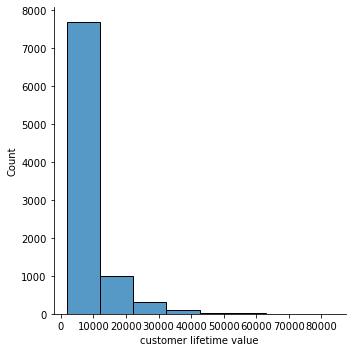

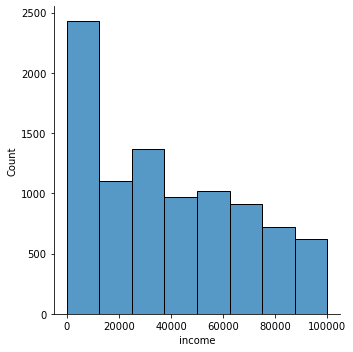

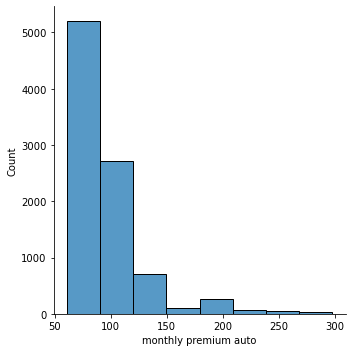

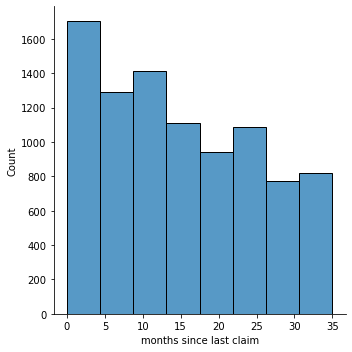

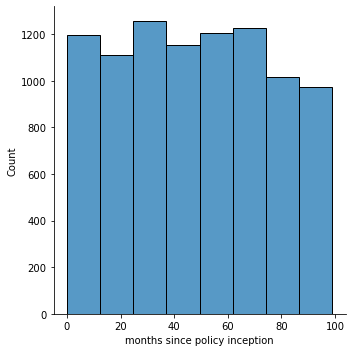

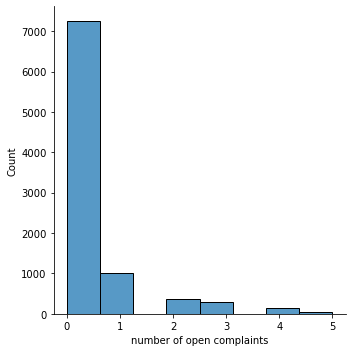

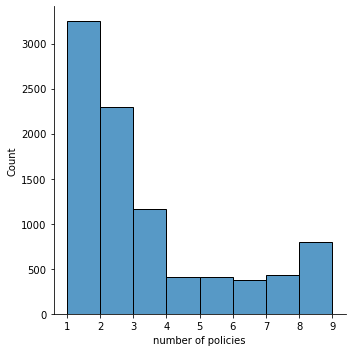

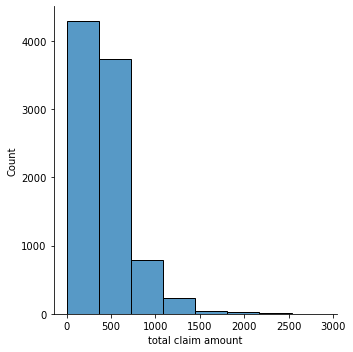

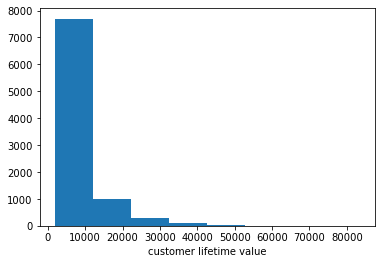

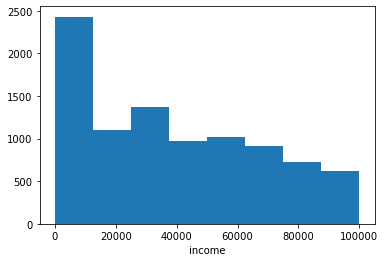

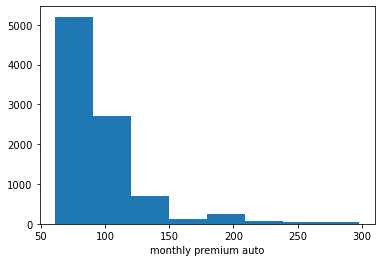

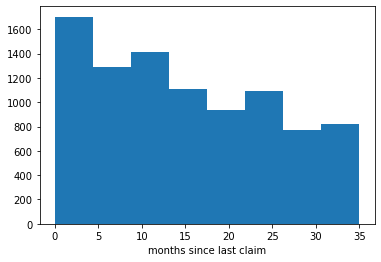

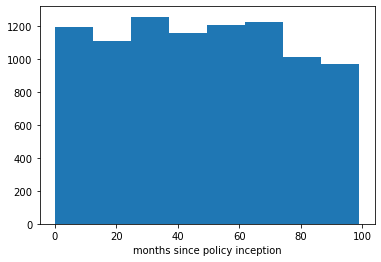

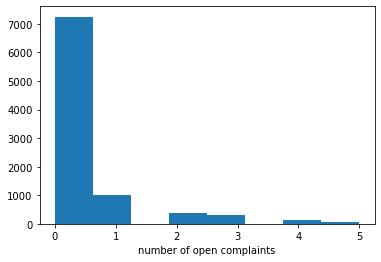

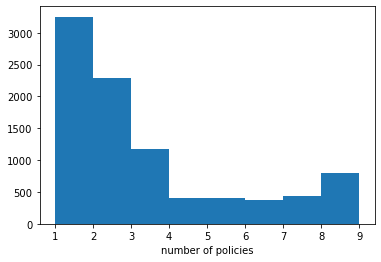

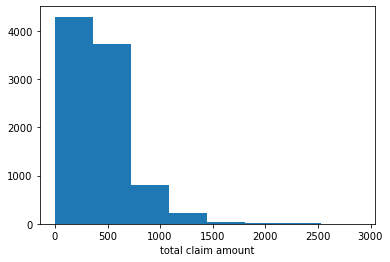

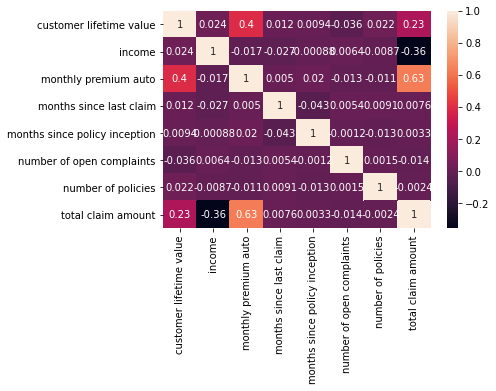

In [4]:
#3 Cleaning/Wrangling/EDA
#     Change headers names.
cols = []
for colname in file.columns:
    cols.append(colname.lower())
file.columns = cols
cols

#      Deal with NaN values.
#display(file.isna().sum()) #checking for nan values
file = file.replace(np.nan,0)
#I did not have any nan values
#     Categorical Features.
categorical = file.select_dtypes(object)   #only works for object can also use exclude np.number
categorical
#     Numerical Features.
numerical = file.select_dtypes(include = np.number)
numerical
#changed date into a better format
file['effective to date'] = pd.to_datetime(file['effective to date'])
#     Exploration.
for col in numerical.columns:
    sns.displot(numerical[col],bins = 8)
    plt.show()
for col in numerical.columns:
    plt.hist(numerical[col],bins = 8)
    plt.xlabel(col)
    plt.show()    
correlations_matrix = file.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
#display(file.head())
#display(file.shape)


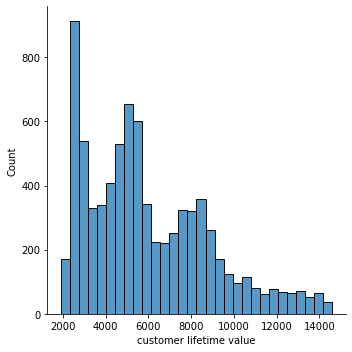

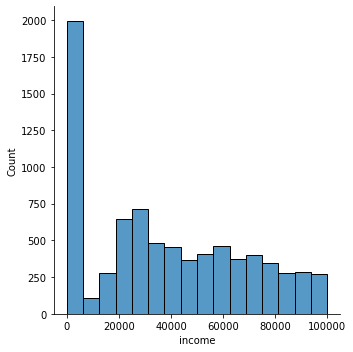

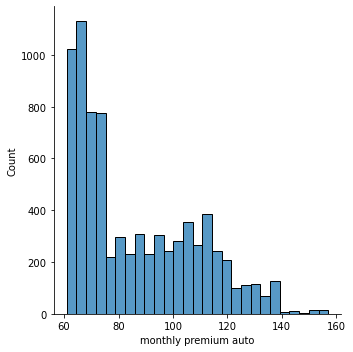

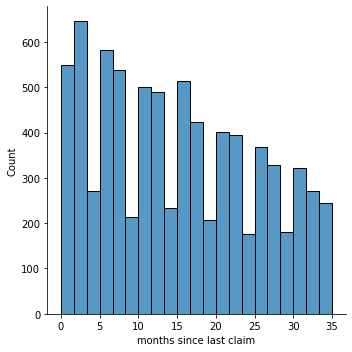

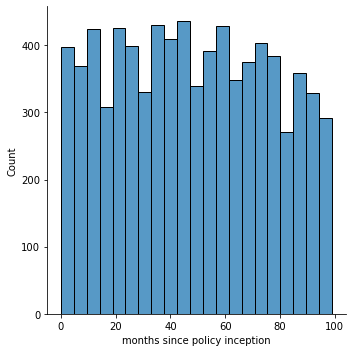

(7849, 7)


TypeError: drop() got multiple values for argument 'axis'

In [9]:
#4 Processing file

#     Dealing with outliers.
iqr = np.percentile(file['customer lifetime value'],75) - np.percentile(file['customer lifetime value'],25)
upper_limit = np.percentile(file['customer lifetime value'],75) + 1.5*iqr
lower_limit = np.percentile(file['customer lifetime value'],25) - 1.5*iqr
file = file[(file['customer lifetime value']>lower_limit) & (file['customer lifetime value']<upper_limit)]
sns.displot(file['customer lifetime value'])
plt.show()
iqr = np.percentile(file['income'],75) - np.percentile(file['income'],25)
upper_limit = np.percentile(file['income'],75) + 1.5*iqr
lower_limit = np.percentile(file['income'],25) - 1.5*iqr
file = file[(file['income']>lower_limit) & (file['income']<upper_limit)]
sns.displot(file['income'])
plt.show()
iqr = np.percentile(file['monthly premium auto'],75) - np.percentile(file['monthly premium auto'],25)
upper_limit = np.percentile(file['monthly premium auto'],75) + 1.5*iqr
lower_limit = np.percentile(file['monthly premium auto'],25) - 1.5*iqr
file = file[(file['monthly premium auto']>lower_limit) & (file['monthly premium auto']<upper_limit)]
sns.displot(file['monthly premium auto'])
plt.show()
iqr = np.percentile(file['months since last claim'],75) - np.percentile(file['months since last claim'],25)
upper_limit = np.percentile(file['months since last claim'],75) + 1.5*iqr
lower_limit = np.percentile(file['months since last claim'],25) - 1.5*iqr
file = file[(file['months since last claim']>lower_limit) & (file['months since last claim']<upper_limit)]
sns.displot(file['months since last claim'])
plt.show()
iqr = np.percentile(file['months since policy inception'],75) - np.percentile(file['months since policy inception'],25)
upper_limit = np.percentile(file['months since policy inception'],75) + 1.5*iqr
lower_limit = np.percentile(file['months since policy inception'],25) - 1.5*iqr
file = file[(file['months since policy inception']>lower_limit) & (file['months since policy inception']<upper_limit)]
sns.displot(file['months since policy inception'])
plt.show()
#separate the features from the labels
y = file['total claim amount']
X = file.drop(['total claim amount'], axis=1)
#categorical features and numerical ones are going to be treated differently
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

#     Normalization.
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_num)
x_normalized = MinMaxtransformer.transform(X_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns)
x_normalized.head()

#     Encoding Categorical file.
#categorical values
X_cat = file.select_dtypes(include = object)
#X_cat.head()
X_cat_new = X_cat.drop('customer','effective_to_date',axis=1)
#label encoding 
from sklearn.preprocessing import LabelEncoder
label_encoded = pd.DataFrame(data=None, columns=X_cat.columns)
for col in X_cat:
    label_encoded[col] = LabelEncoder().fit(X_cat[col]).transform(X_cat[col]) 
display(label_encoded.head())
X = pd.concat([x_normalized, label_encoded], axis=1)     

#     Splitting into train set and test set.
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=33)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [10]:
#5 - Modeling
#Apply model.
#train/fit model 
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)
predictions = lm.predict(X_test)
r2_score(y_test, predictions)   

0.5289837690461799

In [11]:
#6 - Model Validation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#    R2.
r2 = r2_score(y_test, predictions)
r2
#    MSE.
mse = mean_squared_error(y_test,predictions)
print('mse',mse)
#    RMSE.
rmse = np.sqrt(mse)
print('rmse',rmse)
#    MAE.
mae = mean_absolute_error(y_test, predictions)
print('mae',mae)

mse 24604.874560878918
rmse 156.85941017637074
mae 119.11470858785594


In [12]:
#7 - Reporting
#    Present results.
#***conclusion = the greater accuracy was around .40 test size, and the final R2 value was 0.53*** 